## Email Spam Classification by using ML Algorithms : Logistic Regression, Naive Bayes, K-Nearest Neighbour, Support Vector Machine, Decision Tree, Random Forest

In [2]:
# Importing and Preprocessing the data
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/22/47/9350b2eeeaef8c0fd3ec3505c8a0481b576845b3df0d71c76f989c23d3c6/ucimlrepo-0.0.6-py3-none-any.whl.metadata


In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [4]:
X

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.DataFrame(X, columns = spambase.variables)
df['target']=y

In [8]:
#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Loistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
logistic_reg_pred = logistic_reg.predict(X_test_scaled)
logistic_reg_accuracy = accuracy_score (y_test, logistic_reg_pred )
print ("Logistic Regression Accuracy:",logistic_reg_accuracy)

Logistic Regression Accuracy: 0.9196525515743756


In [12]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



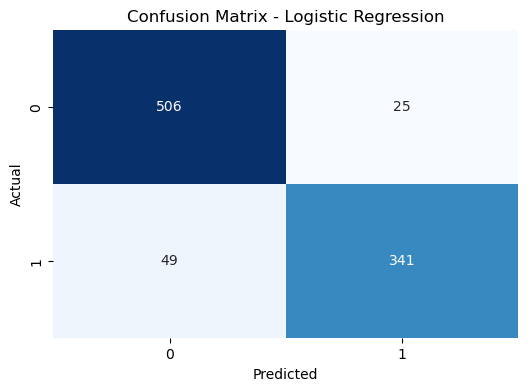

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logistic_reg_cm = confusion_matrix(y_test,logistic_reg_pred)
plt.figure(figsize = (6,4))
sns.heatmap(logistic_reg_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [15]:
naive_bayes_pred = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)

In [16]:
print("Accuracy Score for Naive Bayes:", naive_bayes_accuracy)
print(classification_report(y_test, naive_bayes_pred))

Accuracy Score for Naive Bayes: 0.8208469055374593
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       531
           1       0.72      0.95      0.82       390

    accuracy                           0.82       921
   macro avg       0.83      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



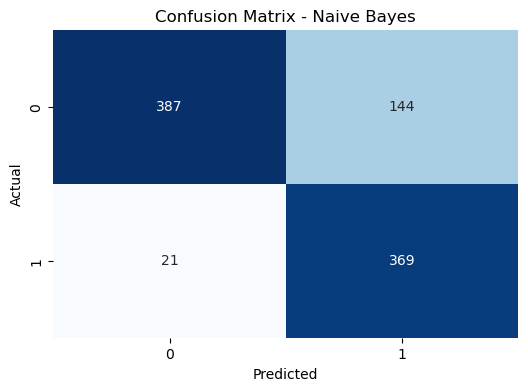

In [29]:
Naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)
plt.figure(figsize = (6,4))
sns.heatmap(Naive_bayes_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K- Nearest Neighbour

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

from sklearn.model_selection import cross_val_score, cross_validate
knn_cv_scores = cross_val_score(knn, X_train_scaled,y_train, cv=5)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [19]:
print(knn_cv_scores)

[0.9048913  0.89538043 0.91576087 0.90353261 0.90896739]


In [20]:
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of KNN model is: ", knn_accuracy)
print(classification_report(y_test, knn_pred))

Accuracy of KNN model is:  0.8935939196525515
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       531
           1       0.90      0.84      0.87       390

    accuracy                           0.89       921
   macro avg       0.89      0.89      0.89       921
weighted avg       0.89      0.89      0.89       921



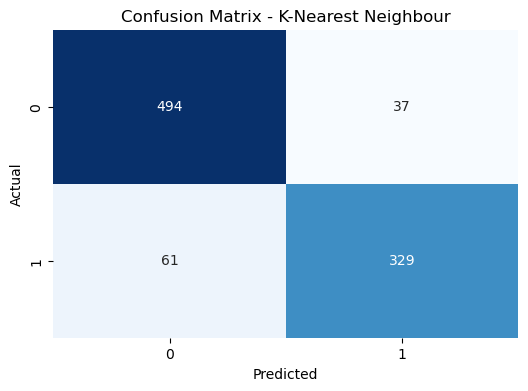

In [30]:
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6,4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - K-Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine

In [22]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit (X_train_scaled, y_train)

svm_pred = svm_model.predict (X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("accuracy for SVM is ", svm_accuracy)
print(classification_report(y_test, svm_pred))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for SVM is  0.9348534201954397
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                           0.93       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.93      0.93       921



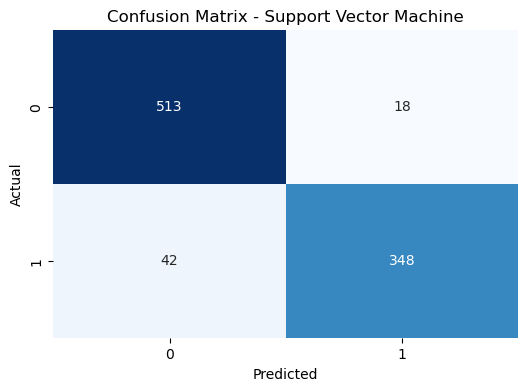

In [31]:
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6,4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

decision_tree_pred = decision_tree.predict (X_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("accuracy for decision Tree is ", decision_tree_accuracy)
print(classification_report(y_test, decision_tree_pred))

accuracy for decision Tree is  0.9044516829533116
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       531
           1       0.90      0.87      0.89       390

    accuracy                           0.90       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.90      0.90      0.90       921



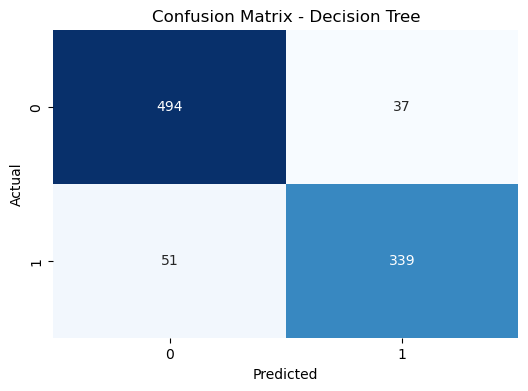

In [32]:
DT_cm = confusion_matrix(y_test, decision_tree_pred)
plt.figure(figsize = (6,4))
sns.heatmap(DT_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

rf_pred = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest Classifier is", rf_accuracy)
print(classification_report(y_test, rf_pred))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of Random Forest Classifier is 0.9587404994571118
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.96       921
weighted avg       0.96      0.96      0.96       921



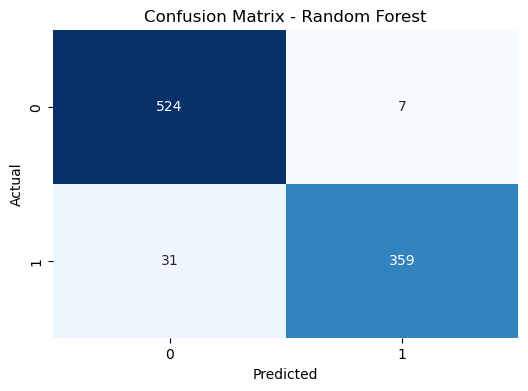

In [33]:
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize = (6,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the accuracy for each of the algorithms used and also print the False Positive rate for each algorithm.

In [34]:
from sklearn.metrics import confusion_matrix

# Function to calculate False Positive Rate
def calculate_FPR(conf_matrix):
    FP = conf_matrix[0][1]  # False Positives
    TN = conf_matrix[0][0]  # True Negatives
    return FP / (FP + TN)


In [35]:
# Accuracy and FPR for Logistic Regression
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_pred)
logistic_reg_cm = confusion_matrix(y_test, logistic_reg_pred)
logistic_reg_fpr = calculate_FPR(logistic_reg_cm)
print("Logistic Regression:")
print("Accuracy:", logistic_reg_accuracy)
print("False Positive Rate:", logistic_reg_fpr)

Logistic Regression:
Accuracy: 0.9196525515743756
False Positive Rate: 0.047080979284369114


In [36]:
# Accuracy and FPR for Naive Bayes
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_pred)
naive_bayes_cm = confusion_matrix(y_test, naive_bayes_pred)
naive_bayes_fpr = calculate_FPR(naive_bayes_cm)
print("\nNaive Bayes:")
print("Accuracy:", naive_bayes_accuracy)
print("False Positive Rate:", naive_bayes_fpr)


Naive Bayes:
Accuracy: 0.8208469055374593
False Positive Rate: 0.2711864406779661


In [37]:
# Accuracy and FPR for K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
knn_fpr = calculate_FPR(knn_cm)
print("\nK-Nearest Neighbors:")
print("Accuracy:", knn_accuracy)
print("False Positive Rate:", knn_fpr)


K-Nearest Neighbors:
Accuracy: 0.8935939196525515
False Positive Rate: 0.0696798493408663


In [38]:
# Accuracy and FPR for Support Vector Machine
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
svm_fpr = calculate_FPR(svm_cm)
print("\nSupport Vector Machine:")
print("Accuracy:", svm_accuracy)
print("False Positive Rate:", svm_fpr)


Support Vector Machine:
Accuracy: 0.9348534201954397
False Positive Rate: 0.03389830508474576


In [39]:
# Accuracy and FPR for Decision Tree
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
decision_tree_fpr = calculate_FPR(decision_tree_cm)
print("\nDecision Tree:")
print("Accuracy:", decision_tree_accuracy)
print("False Positive Rate:", decision_tree_fpr)


Decision Tree:
Accuracy: 0.9044516829533116
False Positive Rate: 0.0696798493408663


In [40]:
# Accuracy and FPR for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
rf_fpr = calculate_FPR(rf_cm)
print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("False Positive Rate:", rf_fpr)


Random Forest:
Accuracy: 0.9587404994571118
False Positive Rate: 0.013182674199623353
